# The Settlers of Catan Scoring

In [47]:
import pandas as pd
import numpy as np
import copy
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [48]:
raw_scores = pd.read_excel('catan.xlsx', parse_dates=[0])

In [49]:
remove_5cities = False
raw_scores["problematic_games"] = 0
raw_scores.loc[raw_scores["Oyun No"].isin(list(raw_scores[raw_scores["Şehir Sayısı"] == 5]["Oyun No"].unique())), \
               "problematic_games"] = 1
if remove_5cities:
    raw_scores = raw_scores[~raw_scores["Oyun No"].isin(raw_scores[raw_scores["Şehir Sayısı"] == 5]["Oyun No"].unique())]

In [50]:
raw_scores

,Oyun No,Tarih,Asıl oyuncu,Sıra,Yedek oyuncu,Kazanan,Puan,Renk,Şehir Sayısı,Köy Sayısı,...,İlk 3-1 Liman,2-1 Tuğla,2-1 Saman,2022-03-01 00:00:00,2-1 Odun,2-1 Kaya,2-1 Koyun,Zar,Çöl Yeri,problematic_games
0,1.0,2022-02-22,Batuhan,1.0,NaN,Alperen,7.0,Mavi,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,1.0,2022-02-22,Alperen,2.0,NaN,Alperen,10.0,Beyaz,5.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1.0,2022-02-22,Volkan,4.0,Çağatay,Alperen,8.0,Kırmızı,2.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,1.0,2022-02-22,Melis,3.0,Ecem,Alperen,7.0,Turuncu,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,2.0,2022-03-06,Alperen,2.0,NaN,Çağatay,5.0,Beyaz,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,52.0,2022-10-10,Feyza,5.0,NaN,Batuhan,9.0,Turuncu,2.0,2.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,"4, 6, 12, 2, 4, 6",NaN,0
214,52.0,2022-10-10,Alperen,4.0,NaN,Batuhan,8.0,Beyaz,2.0,3.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,"4, 6, 9, 8, 10",NaN,0
215,52.0,2022-10-10,Çağatay,3.0,NaN,Batuhan,5.0,Mavi,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"8, 9, 5, 9, 12",NaN,0
216,52.0,2022-10-10,Ecem,2.0,NaN,Batuhan,8.0,Kahverengi,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"5, 10, 11, 3, 9, 10",NaN,0


In [51]:
raw_scores["player_count"] = raw_scores.groupby("Oyun No")["Sıra"].transform('max')
raw_scores["avg_time_per_player"] = raw_scores["Süre"] / raw_scores["player_count"]

In [52]:
time_col = "Süre"
volkan = raw_scores.loc[(raw_scores["Asıl oyuncu"] == "Volkan") | (raw_scores["Yedek oyuncu"] == "Volkan")]["Oyun No"].unique()
avg_volkan_time = (raw_scores.loc[raw_scores["Oyun No"].isin(volkan)].groupby("Oyun No")[time_col].max().sum()/60)\
      /(raw_scores.loc[raw_scores["Oyun No"].isin(volkan)]["Oyun No"].nunique())
avg_wo_volkan_time = (raw_scores.loc[~raw_scores["Oyun No"].isin(volkan)].groupby("Oyun No")[time_col].max().sum()/60) \
      /(raw_scores.loc[~raw_scores["Oyun No"].isin(volkan)]["Oyun No"].nunique())

extension = raw_scores.loc[raw_scores["Extension"] == 1]["Oyun No"].unique()
avg_extension_time = (raw_scores.loc[raw_scores["Oyun No"].isin(extension)].groupby("Oyun No")[time_col].max().sum()/60) \
      /(raw_scores.loc[raw_scores["Oyun No"].isin(extension)]["Oyun No"].nunique())
avg_regular_time = (raw_scores.loc[~raw_scores["Oyun No"].isin(extension)].groupby("Oyun No")[time_col].max().sum()/60) \
      /(raw_scores.loc[~raw_scores["Oyun No"].isin(extension)]["Oyun No"].nunique())

In [53]:
time_col = "avg_time_per_player"
volkan = raw_scores.loc[(raw_scores["Asıl oyuncu"] == "Volkan") | (raw_scores["Yedek oyuncu"] == "Volkan")]["Oyun No"].unique()
avg_volkan_time_per_player = (raw_scores.loc[raw_scores["Oyun No"].isin(volkan)].groupby("Oyun No")[time_col].max().sum()/60)\
      /(raw_scores.loc[raw_scores["Oyun No"].isin(volkan)]["Oyun No"].nunique())
avg_wo_volkan_time_per_player = (raw_scores.loc[~raw_scores["Oyun No"].isin(volkan)].groupby("Oyun No")[time_col].max().sum()/60) \
      /(raw_scores.loc[~raw_scores["Oyun No"].isin(volkan)]["Oyun No"].nunique())

extension = raw_scores.loc[raw_scores["Extension"] == 1]["Oyun No"].unique()
avg_extension_time_per_player = (raw_scores.loc[raw_scores["Oyun No"].isin(extension)].groupby("Oyun No")[time_col].max().sum()/60) \
      /(raw_scores.loc[raw_scores["Oyun No"].isin(extension)]["Oyun No"].nunique())
avg_regular_time_per_player = (raw_scores.loc[~raw_scores["Oyun No"].isin(extension)].groupby("Oyun No")[time_col].max().sum()/60) \
      /(raw_scores.loc[~raw_scores["Oyun No"].isin(extension)]["Oyun No"].nunique())

### Player Count vs Time passed during Game

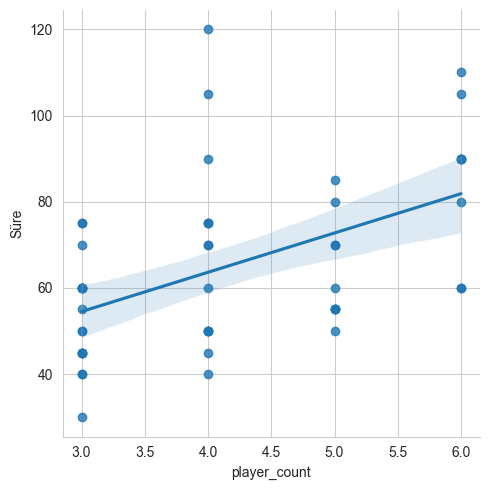

In [54]:
times = pd.merge(raw_scores.groupby("Oyun No", as_index=False).agg({"Süre": 'max'}),
         raw_scores.groupby("Oyun No", as_index=False).agg({"player_count": 'max'}), on="Oyun No")
sns.set_style('whitegrid')
sns.lmplot(x ='player_count', y ='Süre', data = times)

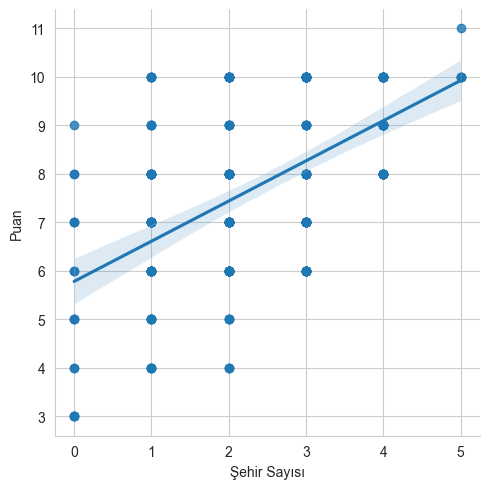

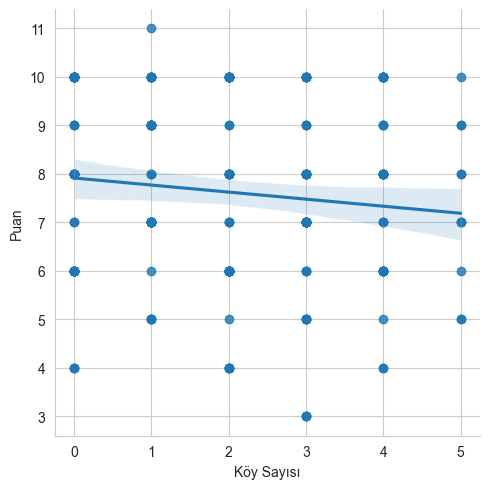

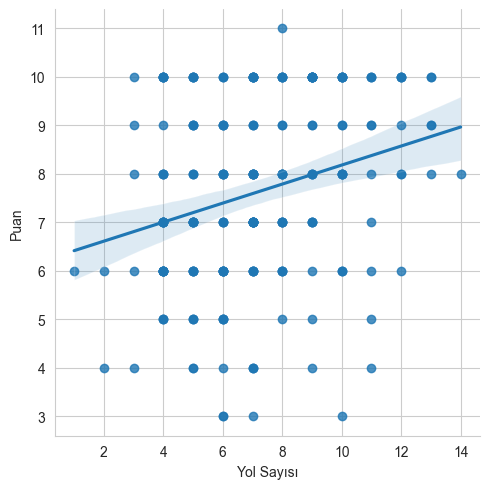

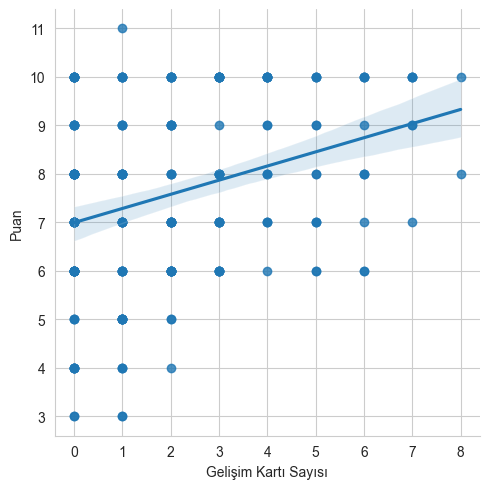

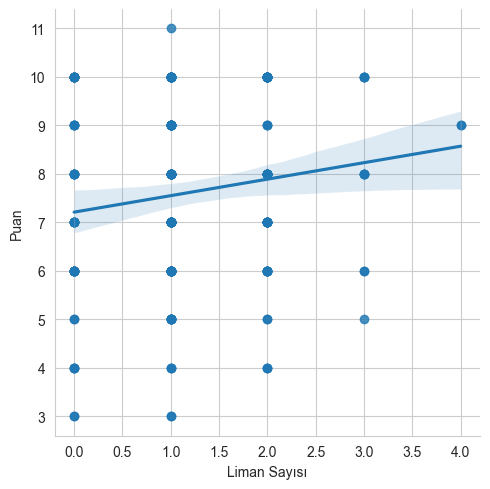

In [55]:
sns.set_style('whitegrid')
sns.lmplot(x ='Şehir Sayısı', y ='Puan', data = raw_scores)

sns.lmplot(x ='Köy Sayısı', y ='Puan', data = raw_scores)

sns.lmplot(x ='Yol Sayısı', y ='Puan', data = raw_scores)

sns.lmplot(x ='Gelişim Kartı Sayısı', y ='Puan', data = raw_scores)

sns.lmplot(x ='Liman Sayısı', y ='Puan', data = raw_scores)

### Time passed per player during game as the # of game increases

<AxesSubplot:xlabel='Oyun No', ylabel='rolling_mean'>

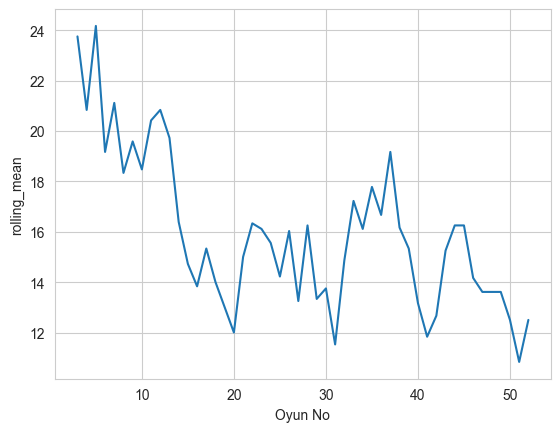

In [56]:
times["time_per_player"] = times["Süre"]/times["player_count"]
times["rolling_mean"] = times["time_per_player"].rolling(3).mean()
sns.lineplot(x="Oyun No", y="rolling_mean", data=times)

In [57]:
total_time = raw_scores.groupby("Oyun No")["Süre"].max().sum()/60
avg_time = total_time/raw_scores["Oyun No"].max()
extension_percent = raw_scores.groupby("Oyun No")["Extension"].max().sum()/raw_scores["Oyun No"].max()
shortest = raw_scores["Süre"].min()
longest = raw_scores["Süre"].max()
player_count_time = raw_scores[["player_count", "Oyun No", "Süre"]].drop_duplicates().groupby("player_count")["Süre"].mean()
print(f"""
Total Hours Played: {total_time}
Avg hour per game: {round(avg_time, 4)}
Extension Games %: {round(100*extension_percent, 2)}
Avg Extension Time (h): {round(avg_extension_time, 3)}
Avg Regular Time (h): {round(avg_regular_time, 3)}
Avg Time w/Volkan (h): {round(avg_volkan_time, 3)}
Avg Time wo/Volkan (h): {round(avg_wo_volkan_time, 3)}
Avg Extension Time per Player: {round(avg_extension_time_per_player, 3)}
Avg Regular Time per Player (h): {round(avg_regular_time_per_player, 3)}
Avg Time w/Volkan per Player (h): {round(avg_volkan_time_per_player, 3)}
Avg Time wo/Volkan per Player (h): {round(avg_wo_volkan_time_per_player, 3)}
Shortest Game (h): {round(shortest/60, 3)}
Longest Game (h): {round(longest/60, 3)}
""")


Total Hours Played: 56.666666666666664
Avg hour per game: 1.0897
Extension Games %: 36.54
Avg Extension Time (h): 1.237
Avg Regular Time (h): 1.005
Avg Time w/Volkan (h): 1.512
Avg Time wo/Volkan (h): 1.024
Avg Extension Time per Player: 0.225
Avg Regular Time per Player (h): 0.292
Avg Time w/Volkan per Player (h): 0.288
Avg Time wo/Volkan per Player (h): 0.264
Shortest Game (h): 0.5
Longest Game (h): 2.0



In [58]:
yedek = raw_scores.loc[~raw_scores["Yedek oyuncu"].isnull()]

In [59]:
yedek["Asıl oyuncu"] = yedek["Yedek oyuncu"]

In [60]:
yedek

,Oyun No,Tarih,Asıl oyuncu,Sıra,Yedek oyuncu,Kazanan,Puan,Renk,Şehir Sayısı,Köy Sayısı,...,2-1 Saman,2022-03-01 00:00:00,2-1 Odun,2-1 Kaya,2-1 Koyun,Zar,Çöl Yeri,problematic_games,player_count,avg_time_per_player
2,1.0,2022-02-22,Çağatay,4.0,Çağatay,Alperen,8.0,Kırmızı,2.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,4.0,26.250000
3,1.0,2022-02-22,Ecem,3.0,Ecem,Alperen,7.0,Turuncu,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,4.0,26.250000
7,3.0,2022-03-08,Feyza,4.0,Feyza,Melis,6.0,Kırmızı,0.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,4.0,30.000000
14,4.0,2022-03-09,Feyza,4.0,Feyza,Batuhan,4.0,Beyaz,2.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,4.0,17.500000
88,24.0,2022-04-01,Feyza,2.0,Feyza,Ecem,8.0,Beyaz,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0,6.0,18.333333


In [61]:
raw_scores.columns

Index([                'Oyun No',                   'Tarih',
                   'Asıl oyuncu',                    'Sıra',
                  'Yedek oyuncu',                 'Kazanan',
                          'Puan',                    'Renk',
                  'Şehir Sayısı',              'Köy Sayısı',
                    'Yol Sayısı',    'Gelişim Kartı Sayısı',
             'ilk Gelişim Kartı',          'İlk Şehirleşen',
                       'İlk Köy',            'Liman Sayısı',
       'İlk Hangi Kaynak yanına',                    'Kasa',
                          'Süre',               'Extension',
                'Başlangıç Saat',             'En Uzun Yol',
                       'Şövalye',     'İlk 2-1 Tuğla Liman',
            'İlk 2-1 Kaya Liman',     'İlk 2-1 Saman Liman',
           'İlk 2-1 Koyun Liman',      'İlk 2-1 Odun Liman',
                 'İlk 3-1 Liman',               '2-1 Tuğla',
                     '2-1 Saman',       2022-03-01 00:00:00,
                      '2

In [62]:
raw_scores = raw_scores[["Oyun No", "Sıra", "Tarih", "Asıl oyuncu",
                         "Kazanan", "Puan", "İlk Şehirleşen", "İlk Köy", "ilk Gelişim Kartı",
                         "En Uzun Yol", "Şövalye"]]
yedek = yedek[["Oyun No", "Sıra", "Tarih", "Asıl oyuncu", "Kazanan", "Puan", "İlk Şehirleşen", "İlk Köy",
              "ilk Gelişim Kartı", "En Uzun Yol", "Şövalye"]]

raw_scores = pd.concat([raw_scores, yedek], axis=0)

In [63]:
raw_scores.columns = ["game_id", "rank", "date", "player", 
                      "winner", "score", "first_city", "first_village",
                      "first_development", "longest_path", "strongest_army"]

In [64]:
def win_or_lose(player: str, winner: str):
    if player == winner:
        return 'W'
    else:
        return 'L'

In [65]:
raw_scores["result"] = "L"
raw_scores.loc[raw_scores["player"] == raw_scores["winner"], "result"] = "W"
scores = copy.deepcopy(raw_scores)

## Avg Points Per Player Per Game Type

<Figure size 1500x800 with 0 Axes>

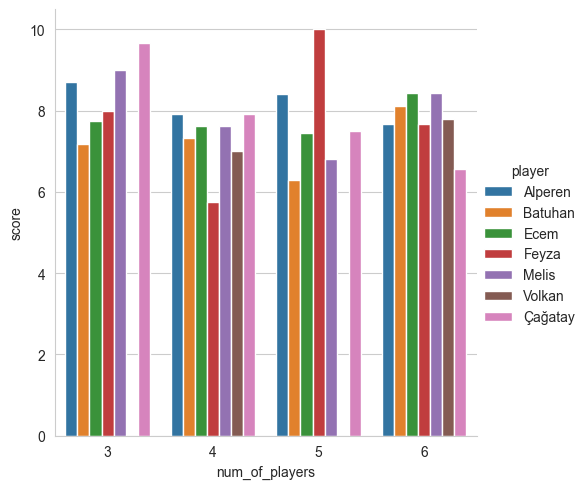

In [83]:
temp = copy.deepcopy(scores)
temp["num_of_players"] = temp.groupby("game_id")["rank"].transform('max')
temp = temp.groupby(["player", "num_of_players"], as_index=False).agg({'score': 'mean'})
rankings = scores.groupby('player').count().drop(['score'], axis=1)
# drop players with 3 games or less
temp = temp.loc[temp["player"].isin(rankings[rankings['result'] >= 5].index)]
temp["num_of_players"] = temp["num_of_players"].astype('int')
temp = temp[["player", "score", "num_of_players"]].drop_duplicates()
plt.figure(figsize=(15,8))
sns.catplot(data=temp, x="num_of_players", y="score", hue="player", kind="bar")

### Boxplot for Avg. Points per # of Players

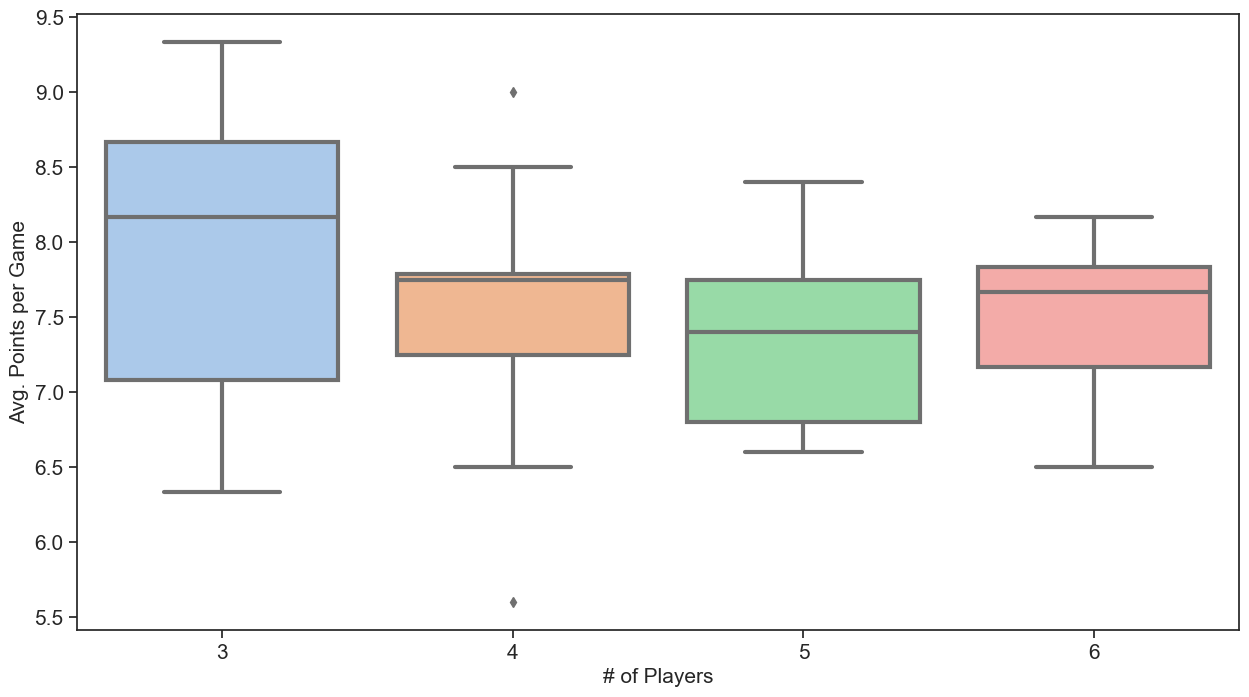

In [85]:
temp = copy.deepcopy(scores)
temp["avg_game_points"] = temp.groupby(["game_id"], as_index=False)["score"].transform('mean')
temp["num_of_players"] = raw_scores.groupby("game_id")["rank"].transform('max')
temp["num_of_players"] = temp["num_of_players"].astype('int')
temp = temp[["game_id", "avg_game_points", "num_of_players"]].drop_duplicates()
plt.figure(figsize=(15,8))

sns.set_theme(style="ticks", palette="pastel")
g = sns.boxplot(x=temp['num_of_players'],  y=temp["avg_game_points"], data=temp, linewidth=3)
g.set_yticklabels(g.get_yticks().astype("float").round(2), size = 15)
g.set_xlabel("# of Players", fontsize = 15)
g.set_ylabel("Avg. Points per Game", fontsize = 15)
g.tick_params(labelsize=15)

<Figure size 1500x800 with 0 Axes>

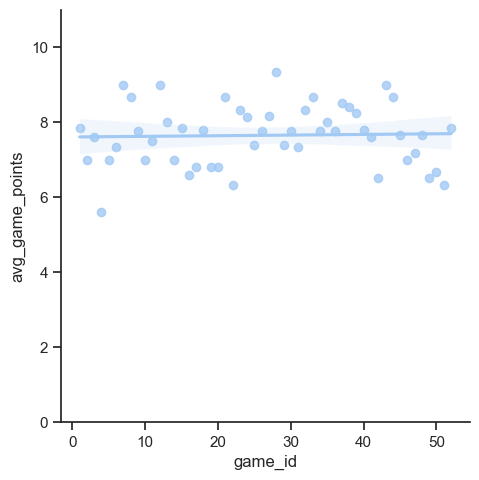

In [86]:
plt.figure(figsize=(15,8))
ax = sns.lmplot(x="game_id", y="avg_game_points", data=temp)
ax.set(ylim=(0, 11))

### Conditional Probability of winning a game given that $expression$

In [87]:
scores["max_rank"] = raw_scores.groupby("game_id")["rank"].transform('max')
scores["min_rank"] = raw_scores.groupby("game_id")["rank"].transform('min')
scores["is_last_player"] = np.where(scores["max_rank"] == scores["rank"], 1, 0)
scores["is_first_player"] = np.where(scores["min_rank"] == scores["rank"], 1, 0)
scores["winner"] = np.where(scores["result"] == "W", 1, 0)
scores['count'] = 1

In [88]:
def calculate_cond_prob(df: pd.DataFrame,
                       win_col: str,
                       value_col: list,
                       conditional_col: list):
    
    temp = pd.pivot_table(
        df, 
        values=value_col, 
        index=win_col, 
        columns=conditional_col, 
        aggfunc=np.size, 
        fill_value=0
    )
    PB = sum(temp.iloc[:,1])/sum(sum(temp.values))
    PANB = temp.iloc[1,1]/sum(sum(temp.values))

    print(f"Probability of winning the game, given that the {conditional_col[0]} is 1 {round(PANB/PB, 2)}% out of {sum(sum(temp.values))} samples.")

Ex:
- P(A) is the probability of a player wins. 
- P(B) is the probability of being last player.
- P(A|B) is the probability of winning the game, given that the player's turn is the last

P(A|B) = P(A ∩ B) / P(B)


In [89]:
calculate_cond_prob(df=scores,
                    win_col=["winner"],
                    value_col="count",
                   conditional_col=["is_last_player"])

calculate_cond_prob(df=scores,
                    win_col=["winner"],
                    value_col="count",
                   conditional_col=["is_first_player"])

calculate_cond_prob(df=scores,
                    win_col=["winner"],
                    value_col="count",
                   conditional_col=["first_city"])

calculate_cond_prob(df=scores,
                    win_col=["winner"],
                    value_col="count",
                   conditional_col=["first_village"])

calculate_cond_prob(df=scores,
                    win_col=["winner"],
                    value_col="count",
                   conditional_col=["first_development"])

calculate_cond_prob(df=scores,
                    win_col=["winner"],
                    value_col="count",
                   conditional_col=["longest_path"])

calculate_cond_prob(df=scores,
                    win_col=["winner"],
                    value_col="count",
                   conditional_col=["strongest_army"])

Probability of winning the game, given that the is_last_player is 1 0.27% out of 223 samples.
Probability of winning the game, given that the is_first_player is 1 0.19% out of 223 samples.
Probability of winning the game, given that the first_city is 1 0.35% out of 223 samples.
Probability of winning the game, given that the first_village is 1 0.25% out of 223 samples.
Probability of winning the game, given that the first_development is 1 0.36% out of 223 samples.
Probability of winning the game, given that the longest_path is 1 0.49% out of 181 samples.
Probability of winning the game, given that the strongest_army is 1 0.52% out of 181 samples.


## Total Win Count per player per game type

<Figure size 2000x1000 with 0 Axes>

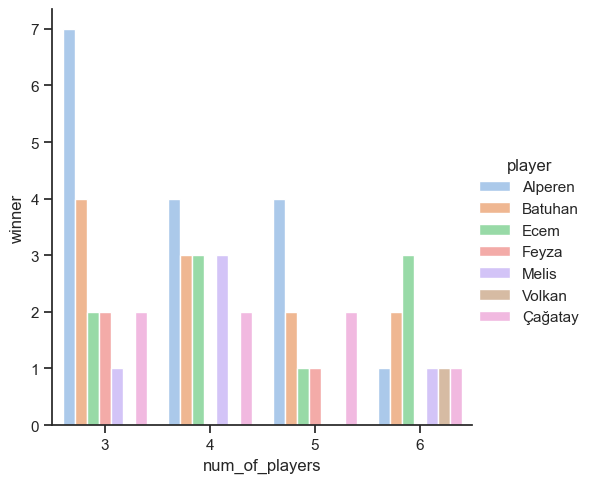

In [97]:
temp = copy.deepcopy(scores)
temp["num_of_players"] = temp.groupby("game_id")["rank"].transform('max')
temp = temp.groupby(["player", "num_of_players"], as_index=False).agg({'winner': 'sum'})
rankings = scores.groupby('player').count().drop(['score'], axis=1)
# drop players with 3 games or less
temp = temp.loc[temp["player"].isin(rankings[rankings['result'] >= 5].index)]
temp["num_of_players"] = temp["num_of_players"].astype('int')
temp = temp[["player", "winner", "num_of_players"]].drop_duplicates()
plt.figure(figsize=(20,10))
sns.catplot(data=temp, x="num_of_players", y="winner", hue="player", kind="bar")

In [94]:
temp = copy.deepcopy(scores)
temp["num_of_players"] = temp.groupby("game_id")["rank"].transform('max')
temp

,game_id,rank,date,player,winner,score,first_city,first_village,first_development,longest_path,strongest_army,result,max_rank,min_rank,is_last_player,is_first_player,count,num_of_players
0,1.0,1.0,2022-02-22,Batuhan,0,7.0,0.0,0.0,1.0,NaN,NaN,L,4.0,1.0,0,1,1,4.0
1,1.0,2.0,2022-02-22,Alperen,1,10.0,1.0,0.0,0.0,NaN,NaN,W,4.0,1.0,0,0,1,4.0
2,1.0,4.0,2022-02-22,Volkan,0,8.0,0.0,1.0,0.0,NaN,NaN,L,4.0,1.0,1,0,1,4.0
3,1.0,3.0,2022-02-22,Melis,0,7.0,0.0,0.0,0.0,NaN,NaN,L,4.0,1.0,0,0,1,4.0
4,2.0,2.0,2022-03-06,Alperen,0,5.0,0.0,1.0,0.0,NaN,NaN,L,3.0,1.0,0,0,1,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,1.0,4.0,2022-02-22,Çağatay,0,8.0,0.0,1.0,0.0,NaN,NaN,L,4.0,1.0,1,0,1,4.0
3,1.0,3.0,2022-02-22,Ecem,0,7.0,0.0,0.0,0.0,NaN,NaN,L,4.0,1.0,0,0,1,4.0
7,3.0,4.0,2022-03-08,Feyza,0,6.0,0.0,1.0,1.0,NaN,NaN,L,4.0,1.0,1,0,1,4.0
14,4.0,4.0,2022-03-09,Feyza,0,4.0,0.0,0.0,0.0,NaN,NaN,L,4.0,1.0,1,0,1,4.0


### Win/Loss Streaks
Graph the win/loss streaks for each player

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
scores = scores.sort_values("date")
scores.loc[scores['result'] == "W", "wins"] = 1
scores.loc[scores['result'] == "L", "losses"] = -1

In [27]:
def plot_win_lose_streaks(player):
    fig, ax = plt.subplots(figsize=(10,1))
    # add a horizontal line at y=0
    plt.axhline(y=0, color='black', linewidth=3)
    
    # separate wins, draws and losses for so we can show them in different colors
    scores[scores['player']==player]['wins'].plot.bar(ax=ax, color='green', width=1)
    scores[scores['player']==player]['losses'].plot.bar(ax=ax, color='red', width=1)
    
    plt.title(player, loc='left')

    ax.tick_params(bottom=False, labelbottom=False)
    plt.gca().invert_xaxis()

    plt.show()

In [28]:
# check volkan
players = scores.drop_duplicates('player')['player']
def wins_in_every_x_game(player, df):
    data = df[(df['player']==player)]
    data.fillna({"wins": 0}, inplace=True)
    data["game_id"] = data["count"].cumsum()
    data["previous_status"] = data["wins"].shift(1)
    data["previous_game"] = data["game_id"].shift(1)
    data.loc[data["previous_status"] == 1, "last_win_game"] = data.loc[data["previous_status"] == 1, "previous_game"]
    data.loc[(data["game_id"] == data.game_id.max()) & (data["wins"] == 1), "last_win_game"] = data.game_id.max()
    data = data.loc[~data["last_win_game"].isnull()]
    data["previous_last_win_game"] = data["last_win_game"].shift(1)
    data["diff"] = data["last_win_game"] - data["previous_last_win_game"]
    data.fillna({"diff": data.last_win_game}, inplace=True)
    data["game_id"] = data["count"].cumsum()
    return data[["game_id", "player", "diff"]]
winning = pd.DataFrame()
for player in players:
    data = wins_in_every_x_game(player, df=scores)
    winning = pd.concat([winning, data], axis=0)
    mean_ = round(np.mean(data["diff"]),2)
    print(f"{player} Wins in Every {mean_ if mean_ > 0 else 0} game")
winning = winning.reset_index(drop=True)
winning["rolling_mean"] = winning.groupby("player")["diff"].apply(lambda x: x.rolling(2).mean())

Batuhan Wins in Every 4.27 game
Alperen Wins in Every 2.81 game
Volkan Wins in Every 6.0 game
Melis Wins in Every 5.2 game
Çağatay Wins in Every 4.0 game
Ecem Wins in Every 4.33 game
Feyza Wins in Every 3.67 game
Canberk Wins in Every 0 game
Aysima Wins in Every 0 game
İzel Wins in Every 0 game


<AxesSubplot:xlabel='game_id', ylabel='rolling_mean'>

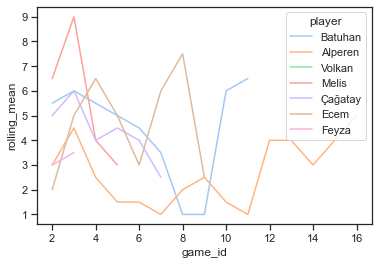

In [29]:
sns.lineplot(x="game_id", y="rolling_mean", hue="player", data=winning)

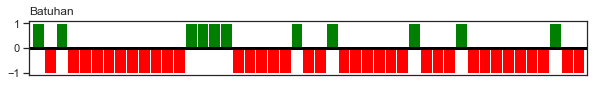

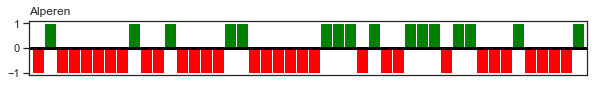

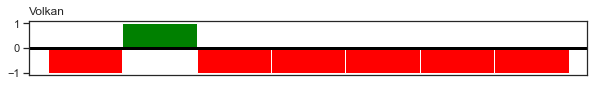

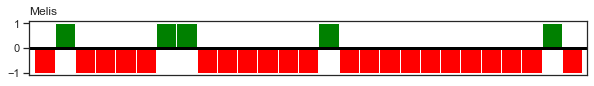

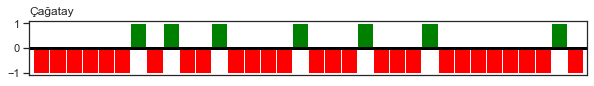

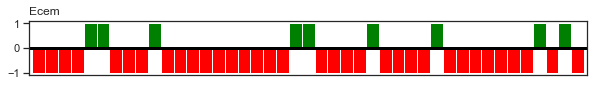

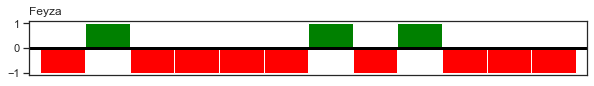

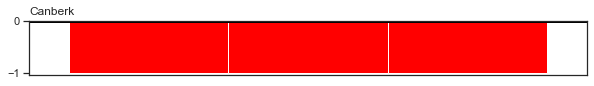

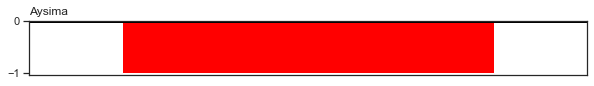

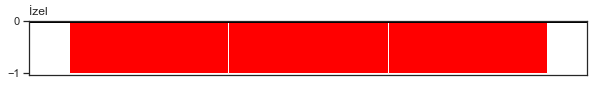

In [30]:
for player in players:
    plot_win_lose_streaks(player)

## Rankings

Show and rank via win percentage for each player. Alternatives would be
 - total number of wins
 - total IMPs scored
 
but go with win percentages for now

In [31]:
rankings = scores.groupby('player').count().drop(['score'], axis=1)
# drop players with 3 games or less
rankings = rankings[rankings['result'] >= 3]
rankings['pct'] = rankings['wins'] / rankings['result']
rankings = rankings.sort_values(by='pct', ascending=False)

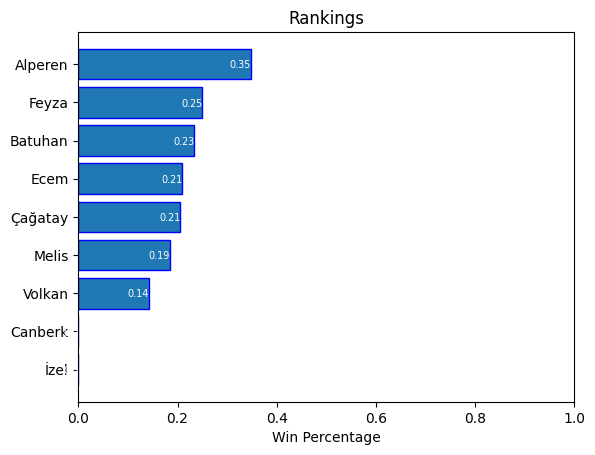

In [32]:
plt.rcdefaults()
fig, ax = plt.subplots()

y_pos = np.arange(len(rankings))
ax.barh(y_pos, rankings['pct'], edgecolor='blue')
ax.set_yticks(y_pos, labels=list(rankings.index))
ax.invert_yaxis()  # highest first
ax.set_xlabel('Win Percentage')
ax.set_title('Rankings')

for i in range(len(rankings.index)):
    plt.text(rankings['pct'][i], y_pos[i], round(rankings['pct'][i],2), 
             ha='right', va='center_baseline', fontsize='x-small', color='white')

ax.set_xlim((0, 1))
plt.show()

## Confidence Intervals

In probability theory and statistics, the binomial distribution with parameters n and p is the discrete probability distribution of the number of successes in a sequence of n independent experiments, each asking a yes–no question, and each with its own Boolean-valued outcome: success (with probability p) or failure (with probability q = 1 − p).

Calculate the confidence interval for the win percentages above, i.e. the *correct* win percentage for each player lies somewhere in the interval calculated with a high probability.

In [33]:
from scipy.stats import binomtest

In [34]:
intervals = {}
for i in range(len(rankings.index)):
    result = binomtest(int(rankings.iloc[i]['wins']), int(rankings.iloc[i]['result']), rankings.iloc[i]['pct'], alternative='two-sided')
    intervals[rankings.index[i]] = result.proportion_ci(confidence_level=0.95)

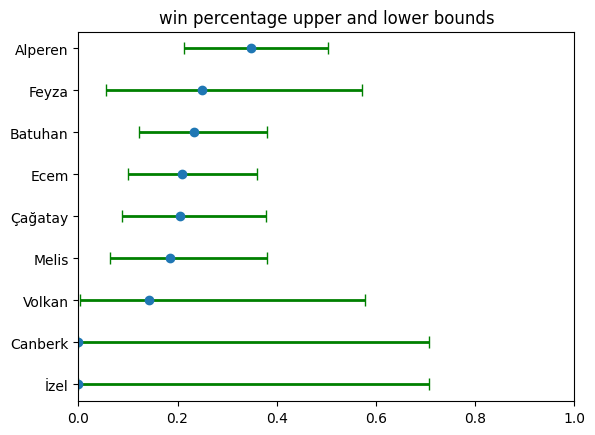

In [35]:
fig, ax = plt.subplots()
x = list()
y = list()
error_range = list()

# reverse for descending order
for i in range(len(intervals.keys())-1,-1, -1):
    # player, center, lower_limit, upper_limit
    lines = rankings.index[i], rankings['pct'][rankings.index[i]], intervals[rankings.index[i]][0], intervals[rankings.index[i]][1]
    x.append(lines[1])
    y.append(lines[0])
    error_range.append([lines[1]-lines[2], lines[3]-lines[1]])

ax.errorbar(x, y, xerr=np.array(error_range).T, fmt='o', ecolor='green', elinewidth=2, capsize=4)

# tidy up the figure
ax.set_xlim((0, 1))
ax.set_title('win percentage upper and lower bounds')
plt.show()

## Rankings - Cont

Another ranking method is to use points for each game: 1 points for a win, 0 points for a loss.

In [36]:
raw_scores["points"] = 0
raw_scores.loc[raw_scores["player"] == raw_scores["winner"], "points"] = 1
scores = copy.deepcopy(raw_scores)

In [37]:
scores

,game_id,rank,date,player,winner,score,first_city,first_village,first_development,longest_path,strongest_army,result,points
0,1.0,1.0,2022-02-22,Batuhan,Alperen,7.0,0.0,0.0,1.0,NaN,NaN,L,0
1,1.0,2.0,2022-02-22,Alperen,Alperen,10.0,1.0,0.0,0.0,NaN,NaN,W,1
2,1.0,4.0,2022-02-22,Volkan,Alperen,8.0,0.0,1.0,0.0,NaN,NaN,L,0
3,1.0,3.0,2022-02-22,Melis,Alperen,7.0,0.0,0.0,0.0,NaN,NaN,L,0
4,2.0,2.0,2022-03-06,Alperen,Çağatay,5.0,0.0,1.0,0.0,NaN,NaN,L,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,1.0,4.0,2022-02-22,Çağatay,Alperen,8.0,0.0,1.0,0.0,NaN,NaN,L,0
3,1.0,3.0,2022-02-22,Ecem,Alperen,7.0,0.0,0.0,0.0,NaN,NaN,L,0
7,3.0,4.0,2022-03-08,Feyza,Melis,6.0,0.0,1.0,1.0,NaN,NaN,L,0
14,4.0,4.0,2022-03-09,Feyza,Batuhan,4.0,0.0,0.0,0.0,NaN,NaN,L,0


add up the points earned to form a league table

#todo calculate average points per game, extension etc. Calculate pairwise win percents.

In [38]:
league = pd.DataFrame()
league['win_count'] = scores.groupby(by="player")['points'].sum()
league['games_played'] = scores.groupby(by="player")['points'].count()
league['scores'] = scores.groupby(by="player")['score'].sum()
league['points_per_game'] = league['scores'] / league['games_played']
league['win_perc'] = league['win_count'] / league['games_played']
league.sort_values(by=['win_perc'], ascending=False, inplace=True)

league

,win_count,games_played,scores,points_per_game,win_perc
player,,,,,
Alperen,16,46,378.0,8.217391,0.347826
Feyza,3,12,88.0,7.333333,0.250000
Batuhan,11,47,339.0,7.212766,0.234043
Ecem,9,43,335.0,7.790698,0.209302
Çağatay,7,34,258.0,7.588235,0.205882
Melis,5,27,206.0,7.629630,0.185185
Volkan,1,7,53.0,7.571429,0.142857
Aysima,0,1,3.0,3.000000,0.000000
Canberk,0,3,20.0,6.666667,0.000000


### Condorcet Method

In [39]:
def find_ranks_in_game(data: pd.DataFrame, score_col: str) -> pd.DataFrame:
    data["rank_in_game"] = data.groupby("game_id")[score_col].rank("dense", ascending=False)
    return data

In [40]:
scores = find_ranks_in_game(data=scores, score_col="score") 

In [41]:
import condorcet

In [42]:
candidates = list(scores.player.unique())
print(f"Candidates are: {candidates}")
votes = []
temp = scores[["game_id", "player", "rank_in_game"]]
for game in scores.game_id.unique():
    _temp = temp.loc[temp["game_id"] == game]
    for player_ in scores.player.unique():
        if player_ not in _temp.player.unique():
            _temp = _temp.append({'game_id': game, 
                            'player': player_, 'rank_in_game': 7}, ignore_index = True)
    _temp = _temp.set_index("player")
    votes.append(_temp.drop("game_id", axis=1).to_dict()["rank_in_game"])
evaluator = condorcet.CondorcetEvaluator(candidates=candidates, votes=votes)
winners, rest_of_table = evaluator.get_n_winners(1)
print(f"Winner is: {winners}")

Candidates are: ['Batuhan', 'Alperen', 'Volkan', 'Melis', 'Feyza', 'Çağatay', 'Ecem', 'Canberk', 'Aysima', 'İzel']
Winner is: ['Alperen']


### Most occurence by rank in game

In [43]:
# check
data = scores[["player", "rank_in_game"]]
temp_ = {}
delete_users = []
for rank_ in data.sort_values("rank_in_game").rank_in_game.unique():
    temp = data.loc[(data["rank_in_game"] == rank_) & (~data["player"].isin(delete_users))]
    temp["count"] = 1
    temp = temp.groupby(["player", "rank_in_game"]).sum().reset_index()
    if len(temp) > 0:
        delete_user = list(temp.iloc[temp.groupby("rank_in_game")["count"].idxmax().values].player)[0]
        delete_users.append(delete_user)
        temp_[delete_user] = rank_
print(temp_)

{'Alperen': 1.0, 'Ecem': 2.0, 'Batuhan': 3.0, 'Melis': 4.0, 'Çağatay': 5.0, 'Aysima': 6.0}


In [44]:
raw_scores

,game_id,rank,date,player,winner,score,first_city,first_village,first_development,longest_path,strongest_army,result,points
0,1.0,1.0,2022-02-22,Batuhan,Alperen,7.0,0.0,0.0,1.0,NaN,NaN,L,0
1,1.0,2.0,2022-02-22,Alperen,Alperen,10.0,1.0,0.0,0.0,NaN,NaN,W,1
2,1.0,4.0,2022-02-22,Volkan,Alperen,8.0,0.0,1.0,0.0,NaN,NaN,L,0
3,1.0,3.0,2022-02-22,Melis,Alperen,7.0,0.0,0.0,0.0,NaN,NaN,L,0
4,2.0,2.0,2022-03-06,Alperen,Çağatay,5.0,0.0,1.0,0.0,NaN,NaN,L,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,1.0,4.0,2022-02-22,Çağatay,Alperen,8.0,0.0,1.0,0.0,NaN,NaN,L,0
3,1.0,3.0,2022-02-22,Ecem,Alperen,7.0,0.0,0.0,0.0,NaN,NaN,L,0
7,3.0,4.0,2022-03-08,Feyza,Melis,6.0,0.0,1.0,1.0,NaN,NaN,L,0
14,4.0,4.0,2022-03-09,Feyza,Batuhan,4.0,0.0,0.0,0.0,NaN,NaN,L,0


### Overall Leagure ranking by games 

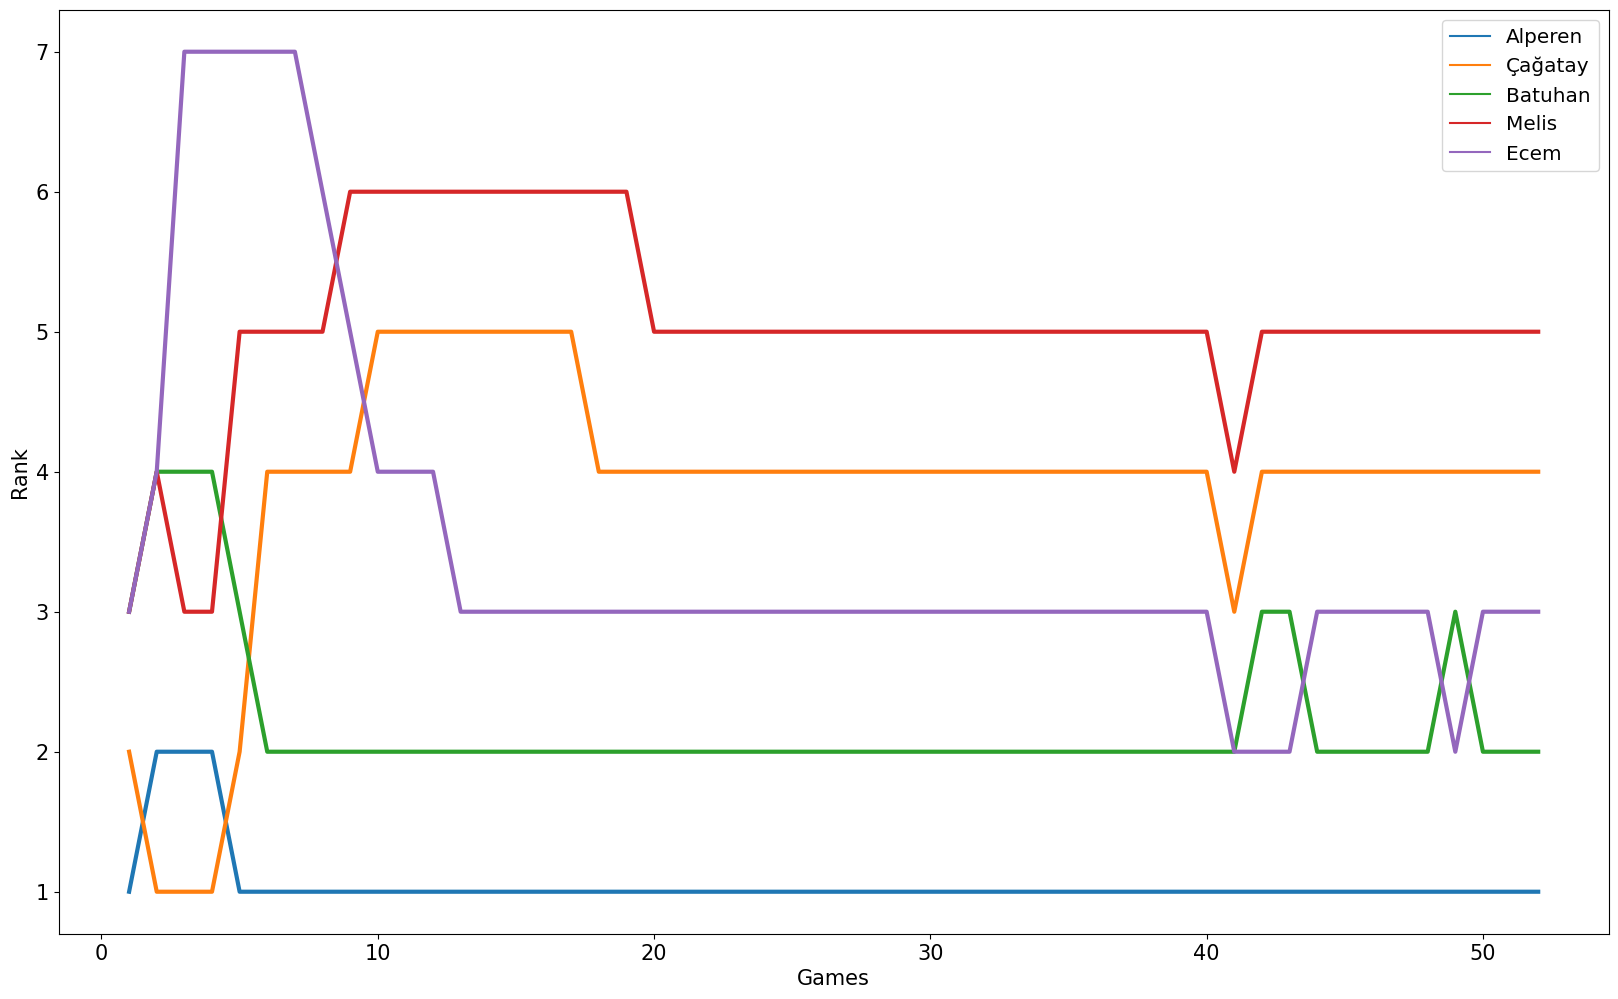

In [45]:
players = pd.DataFrame(raw_scores.player.unique(), columns=["player"])
games = pd.DataFrame(raw_scores.game_id.unique(), columns=["game_id"])
games = games.merge(players, how="cross")
games = pd.merge(games, raw_scores[["game_id", "player", "score"]], on=["player", "game_id"], how="left")
games = games.fillna({'score': 0})
games = games.sort_values(["game_id", "score"], ascending = [True, False])
games["cumsum"] = games.groupby("player")["score"].cumsum()
games = games.sort_values(["game_id", "cumsum"], ascending = [True, False])
games["rank"] = games.groupby("game_id")["cumsum"].rank("dense", ascending=False)

plt.figure(figsize=(20,12))
# keep only players scores greater than 200 points
df = games.loc[games["player"].isin(games.loc[games["cumsum"] > 200].player.unique())]
g = sns.lineplot(x="game_id", y="rank", hue="player", data=df, linewidth = 3)
g.set_xlabel("Games", fontsize = 15)
g.set_ylabel("Rank", fontsize = 15)
g.set_xticklabels(g.get_xticks().astype("int"), size = 15)
g.set_yticklabels(labels=[i for i in range(8)], size = 15)
g.legend(fontsize='x-large', title_fontsize='40')

### Average Rolling Game Scores for Players 

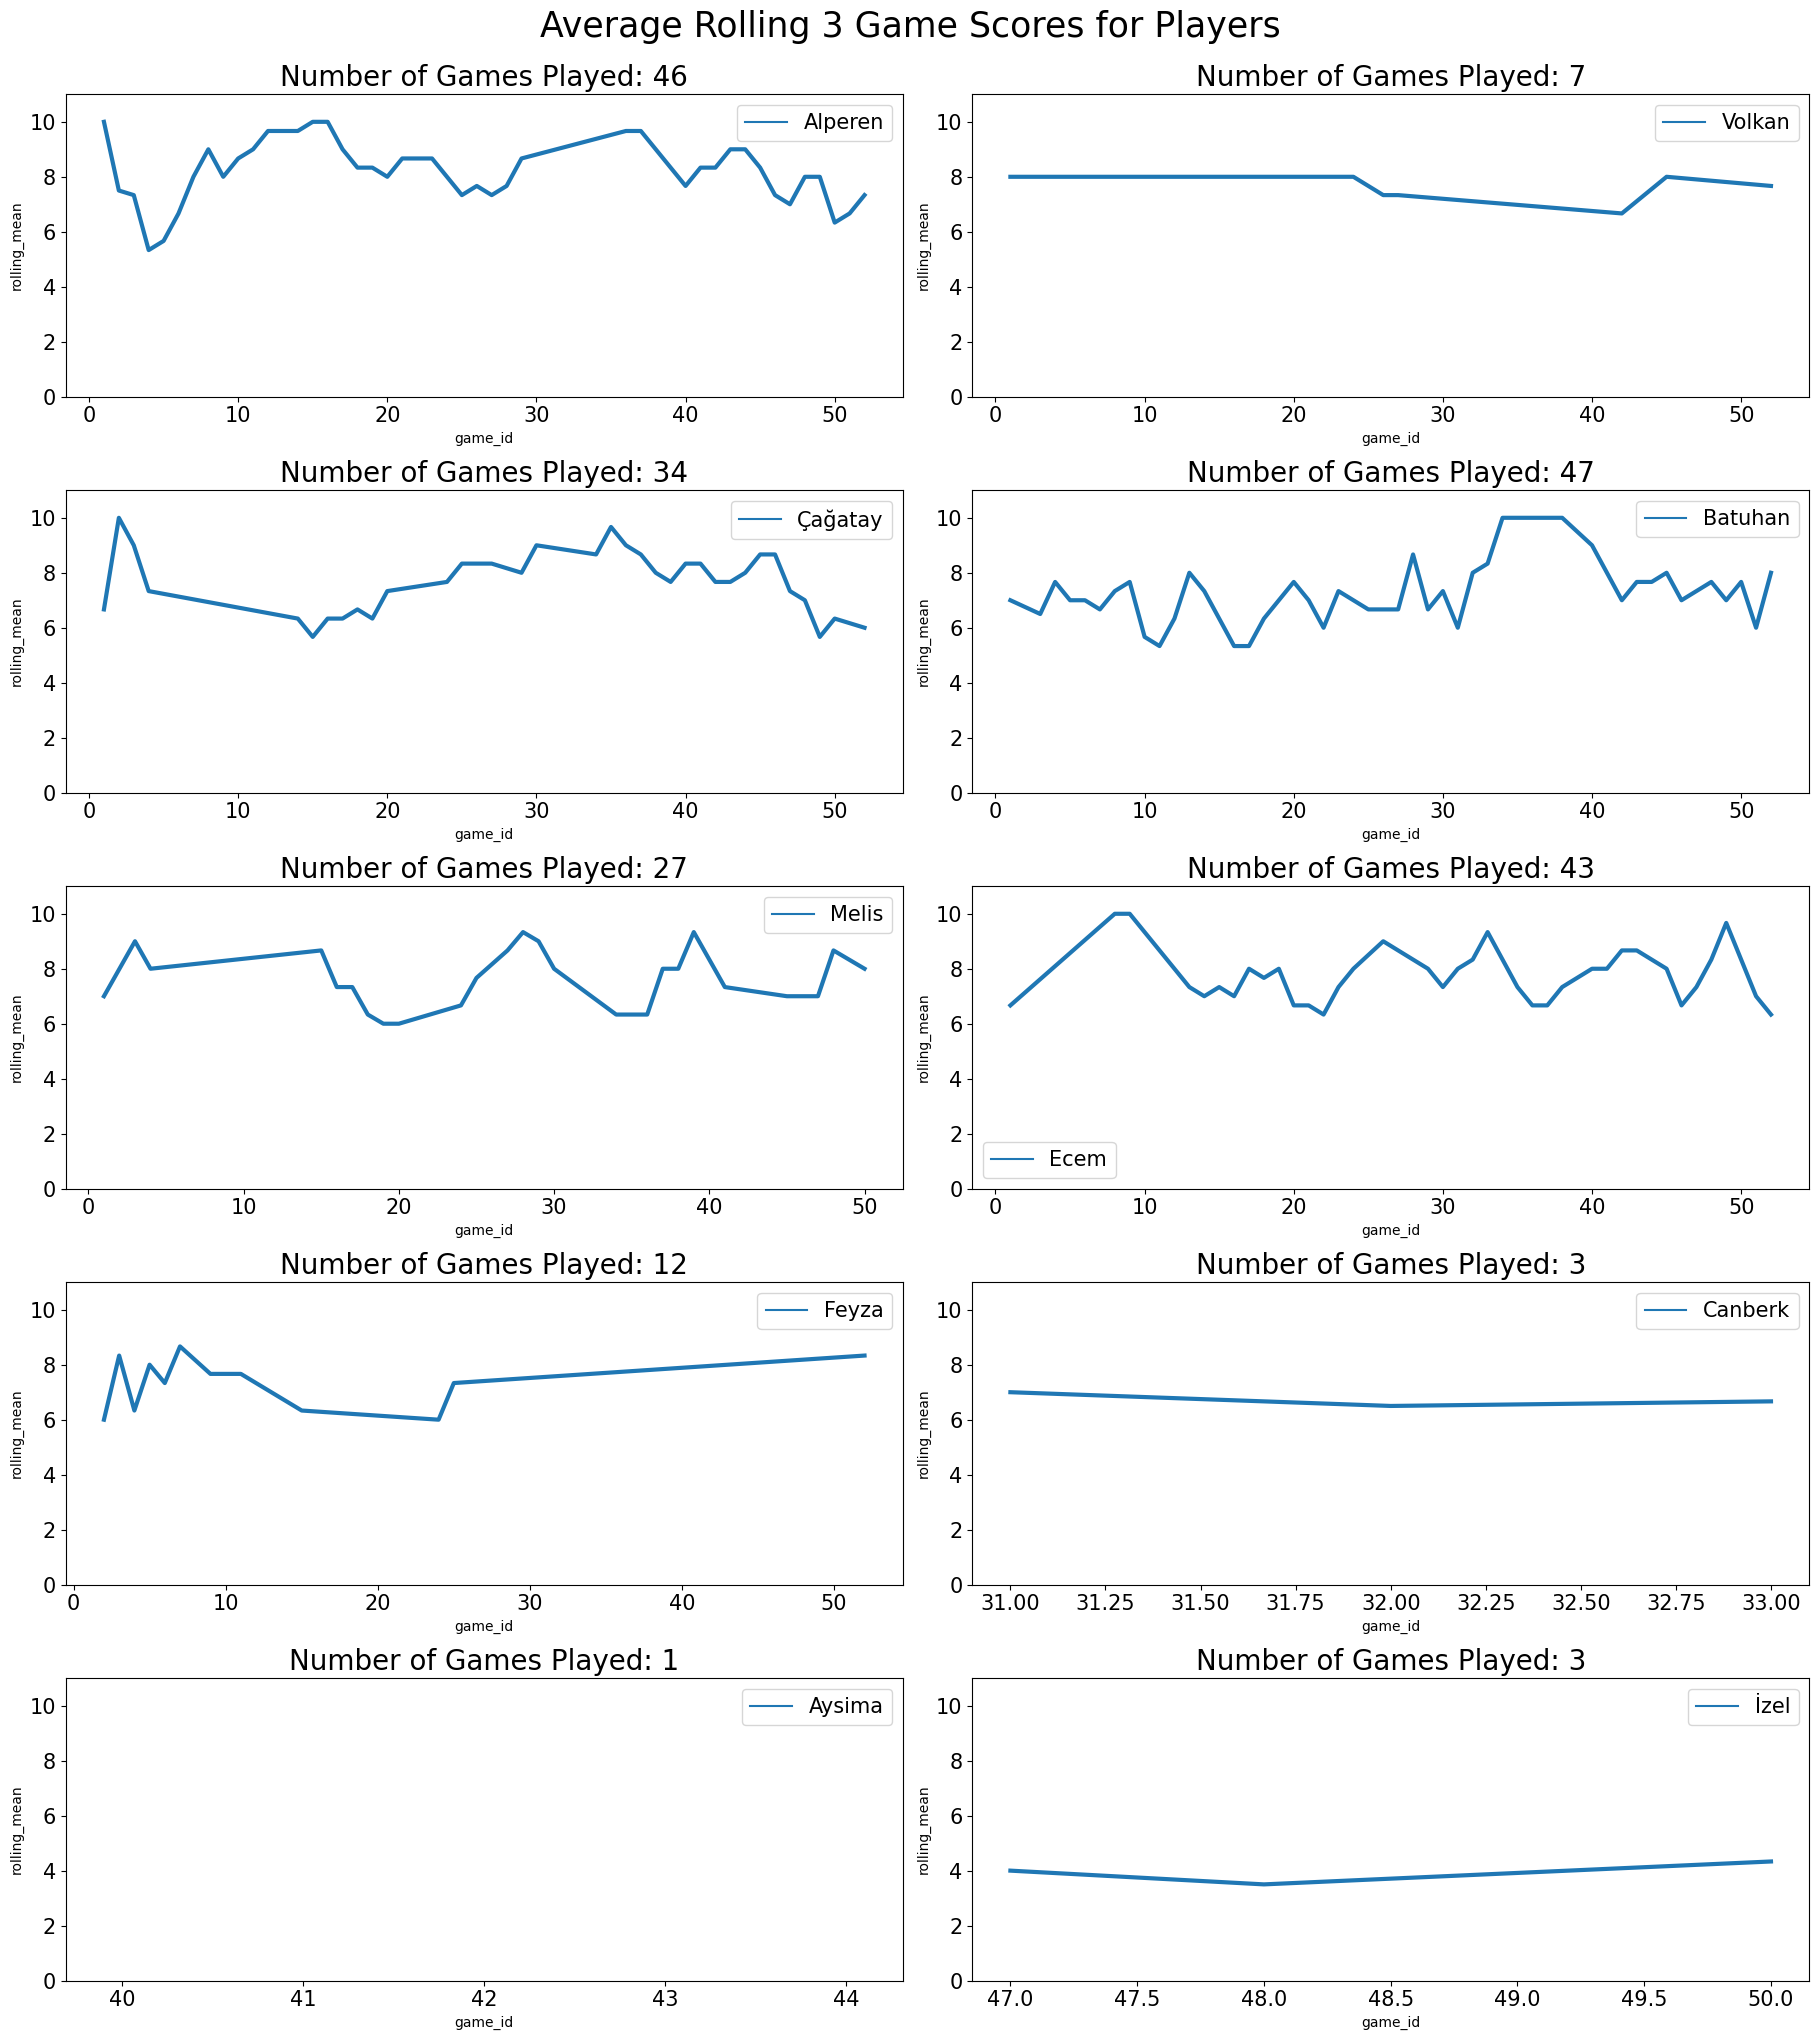

In [46]:
df = raw_scores[["game_id", "player", "score"]]
df["rolling_mean"] = df.groupby(["player"], as_index=False)["score"].transform(lambda x: x.rolling(3, 1).mean())
df = df.reset_index().drop("index", True)
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(18,20))
plt.suptitle("Average Rolling 3 Game Scores for Players", size=25, y=1.01)
ax_x_position = 0
ax_y_position = 0
y_offset = -20 # decrease value if you want to decrease the position of data labels
for player in games.player.unique():
    ax = sns.lineplot(x="game_id", y="rolling_mean", hue="player", data=df.loc[df["player"].isin([player])],
                     ax=axes[ax_x_position, ax_y_position], linewidth=3)
    num_of_games = df.loc[df["player"].isin([player])].game_id.nunique()
    
    ax.set_title(f"Number of Games Played: {num_of_games}", fontsize=20, alpha=1.0)
#     ax.set_xlabel("metric", fontsize=20, alpha=0.0)
#     ax.set_ylabel("Win Counts", fontsize=20)
#     ax.set_xticklabels(labels=['CART', 'RLA-A', 'RLA-G'], rotation=90,
#                        minor=False, fontsize=15)
    ax.set_ylim(0, 11)
#     ax.set_yticks(range(0, 400, 100), fontsize=15)
#     handles, labels = ax.get_legend_handles_labels()
#     if ax_position > 0:
#         ax.set_yticklabels("")
#         ax.set_ylabel("")
    ax.legend(fontsize=15)
    ax.tick_params(labelsize=15)
#     ax.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
    ax_y_position += 1
    if ax_y_position > 1:
        ax_y_position = 0
        ax_x_position += 1
        
plt.tight_layout(pad=0.0, w_pad=1.0, h_pad=1.0) 